## Hamza Mustafa
### Final Project

In [90]:
# Load Packages

!python --version
#%reset
import os
import math
import random
import numpy as np
import pandas as pd
import sklearn as sk

Python 3.11.1


In [91]:
#Directory Checking
os.listdir()
dir = r'D:\Docs\Code\Machine Learning\FinalProject\Manually_Checked_Global_Food_Dataset.csv'

#Save csv file as a dataframe
df = pd.read_csv(dir)

#Print dataframe
df.style

#Select desired columns
clean_df = df[['Country', 'Tons of food scarcity', 'Tons of surplus food']].copy()
#clean_df.style

clean_df['sub'] = clean_df['Tons of surplus food']-clean_df['Tons of food scarcity']
#clean_df.style

#clean_df.loc[clean_df['pclass'] == '1st', 'pclass'] = 1
#clean_df.loc[clean_df['pclass'] == '2nd', 'pclass'] = 2
#clean_df.loc[clean_df['pclass'] == '3rd', 'pclass'] = 3

#clean_df.loc[clean_df['sex'] == 'male', 'sex'] = 0
#clean_df.loc[clean_df['sex'] == 'female', 'sex'] = 1

#avg_age = clean_df['age'].mean(axis = 0)
#print(age_avg)

#Set nan values to average age
#clean_df['age'] = clean_df['age'].fillna(avg_age)

#clean_df.style

In [92]:

negative_values = clean_df[clean_df['sub'] < 0]['sub']

# Find maximum and minimum values among negative numbers
max_negative = negative_values.max()
min_negative = negative_values.min()

positive_values = clean_df[clean_df['sub'] >= 0]['sub']
max_positive = positive_values.max()
min_positive = positive_values.min()

a = 0.01
b = 20

c = -20
d = -0.01

clean_df['normalized_sub'] = clean_df['sub'].apply(lambda x: ((x - min_positive) / (max_positive - min_positive)) * (b - a) + a if x >= 0 else (x - min_negative) / (max_negative - min_negative) * (d - c) + c)

In [93]:
#clean_df.style

In [94]:
t1 = -1

print(math.floor(t1*10))

-10


In [95]:

#Select desired columns
norm_df = clean_df[['Country', 'normalized_sub']].copy()
#norm_df.style

norm_df['classification'] = norm_df['normalized_sub'].apply(lambda x: math.ceil(x) if x >= 0 else math.floor(x))

In [96]:
#Outputs
y = norm_df['classification'].copy()
print(y)

0     -3
1     -1
2     -1
3      1
4     -3
      ..
207    1
208   -1
209    1
210   -2
211   -2
Name: classification, Length: 212, dtype: int64


In [97]:
#Select desired columns
x_df = df[['GDP per Capita', 'Population', 'Infant Mortality Rate', 'Life Expectancy']].copy()

#Find average Infant Mortality Rate
avg_mr = x_df['Infant Mortality Rate'].mean(axis = 0)

#Set nan values to average rate
x_df['Infant Mortality Rate'] = x_df['Infant Mortality Rate'].fillna(avg_mr)

#Find average Life Expectancy
avg_le = x_df['Life Expectancy'].mean(axis = 0)

#Set nan values to average Life Life Expectancy
x_df['Life Expectancy'] = x_df['Life Expectancy'].fillna(avg_le)

x = x_df

In [98]:
#x_df.style

#Create training data using sklearn
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Tree Creation

[Text(0.6176630434782608, 0.9615384615384616, 'GDP per Capita <= 29910.735\ngini = 0.641\nsamples = 100.0%\nvalue = [0.006, 0.018, 0.006, 0.012, 0.006, 0.041, 0.059, 0.42\n0.42, 0.006, 0.006]'),
 Text(0.3744565217391304, 0.8846153846153846, 'Population <= 19612852.0\ngini = 0.654\nsamples = 72.2%\nvalue = [0.008, 0.025, 0.008, 0.016, 0.008, 0.057, 0.074, 0.508\n0.279, 0.008, 0.008]'),
 Text(0.18695652173913044, 0.8076923076923077, 'Infant Mortality Rate <= 14.85\ngini = 0.455\nsamples = 47.3%\nvalue = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012, 0.662, 0.325\n0.0, 0.0]'),
 Text(0.08695652173913043, 0.7307692307692307, 'Infant Mortality Rate <= 3.85\ngini = 0.239\nsamples = 21.3%\nvalue = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.861, 0.139, 0.0\n0.0]'),
 Text(0.05217391304347826, 0.6538461538461539, 'Population <= 6029855.0\ngini = 0.5\nsamples = 4.7%\nvalue = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.5, 0.0\n0.0]'),
 Text(0.034782608695652174, 0.5769230769230769, 'Population <= 697271.5\ngini =

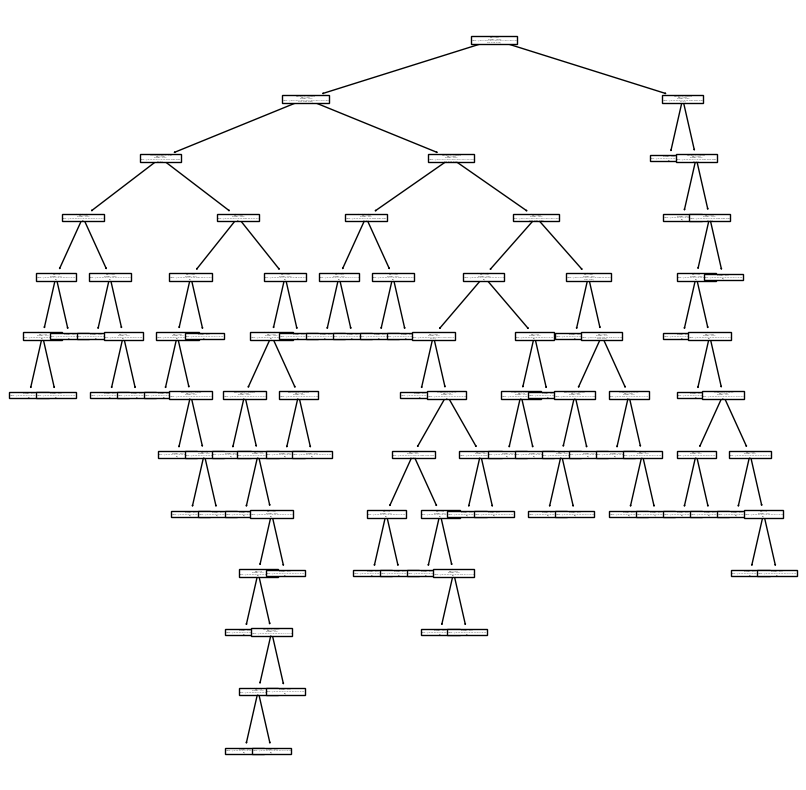

In [99]:
from sklearn import tree
from matplotlib import pyplot as plt

#Create Tree Classifier
class_tree = tree.DecisionTreeClassifier()
class_tree = class_tree.fit(x_train, y_train)

#Plot Tree, adjust DPI and figure size
#plt.figure(figsize=(20, 20), dpi=1800)

plt.figure(figsize=(10, 10), dpi=100)
tree.plot_tree(class_tree, label='all', feature_names=('GDP per Capita', 'Population', 'Infant Mortality Rate', 'Life Expectancy'), proportion='True')

In [100]:
y_pred = class_tree.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.5116279069767442


In [102]:
from sklearn.ensemble import RandomForestClassifier as rfc

#Create Forest Classifier
class_forest = rfc(n_estimators=50, max_leaf_nodes=15)
class_forest = class_forest.fit(x_train, y_train)

#Create Prediction Data
y_pred_forest = class_forest.predict(x_test)

score = accuracy_score(y_test, y_pred_forest)
print(score)
print('The accuracy of this Forest model is: ', 100*score, '%')

0.5581395348837209
The accuracy of this Forest model is:  55.81395348837209 %
